# Analysis of the Scraping Results

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# Load the data
df = pd.read_excel('../results/filtred_papers.xlsx')

In [54]:
df.head(2)

,Title,URL,Abstract,Source,Year,is_relevent,Verdict
0,Towards comprehensive testing on the robustnes...,https://openaccess.thecvf.com/content/CVPR2022...,While deep neural networks (DNNs) have strengt...,Computer Vision Foundation (CVF),2022,1,The abstract discusses adversarial attacks on ...
1,Marnet: Backdoor attacks against cooperative m...,https://ieeexplore.ieee.org/abstract/document/...,Recent works have revealed that backdoor attac...,IEEE,2022,1,The abstract discusses adversarial attacks (ba...


In [55]:
# count number of missing values per column
df.isnull().sum() / len(df)

Title          0.0
URL            0.0
Abstract       0.0
Source         0.0
Year           0.0
is_relevent    0.0
Verdict        0.0
dtype: float64

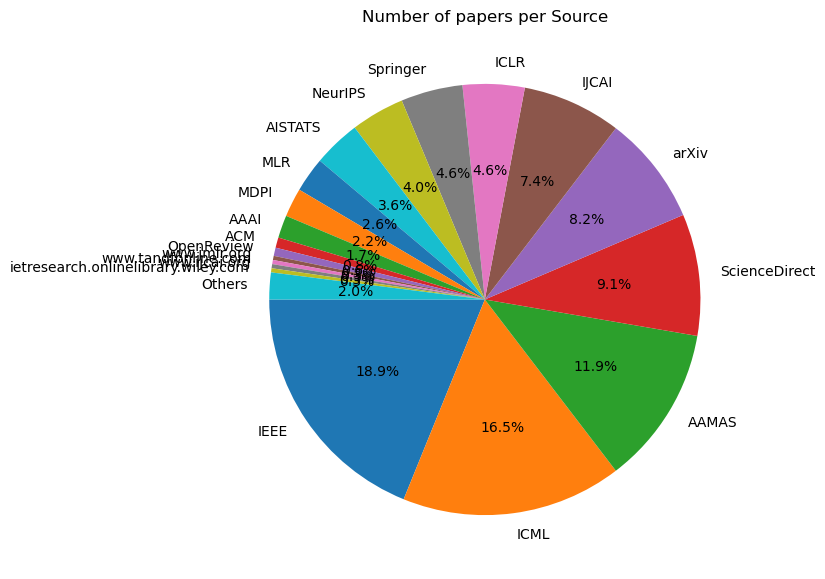

In [56]:
# pie chart of the number of papers per Source, show the sources with less than 2 papers as 'Others'
n_df = df['Source'].value_counts()
n_df['Others'] = sum(n_df[n_df < 2])
n_df = n_df[n_df >= 2]

plt.figure(figsize=(7, 7))
plt.pie(n_df, labels=n_df.index, autopct='%1.1f%%', startangle=180)
plt.title('Number of papers per Source')
plt.show()

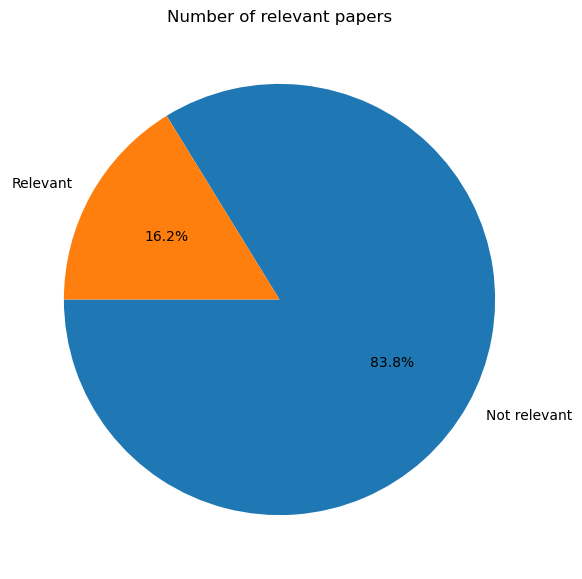

In [57]:
# plot pie chart of is_relevant (0 or 1)
plt.figure(figsize=(7, 7))
plt.pie(df['is_relevent'].value_counts(), labels=['Not relevant', 'Relevant'], autopct='%1.1f%%', startangle=180)
plt.title('Number of relevant papers')
plt.show()

In [58]:
# filter out irrelevant papers
df = df[df['is_relevent'] == 1]
df.drop('is_relevent', axis=1, inplace=True)

In [59]:
# size of the dataset
len(df)

105

In [63]:
# load the data
df = pd.read_excel('../results/relevant_papers.xlsx')

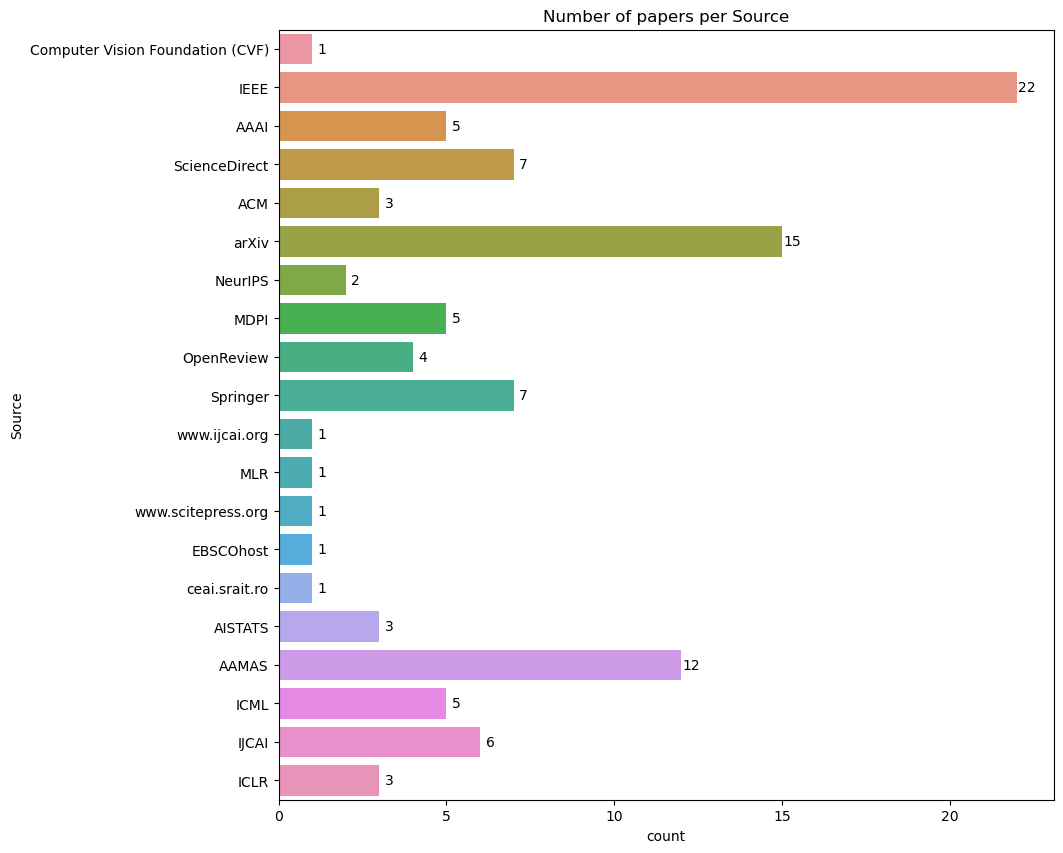

In [64]:
# barplot of the number of papers per Source
plt.figure(figsize=(10, 10))
sns.countplot(data=df, y='Source')
# add number of papers per Source on the right of each bar
for i in range(len(df['Source'].value_counts(sort=False).index)):
    plt.text(df['Source'].value_counts(sort=False).values[i]+0.3, i, df['Source'].value_counts(sort=False).values[i], ha='center', va='center')
plt.title('Number of papers per Source')
plt.show()

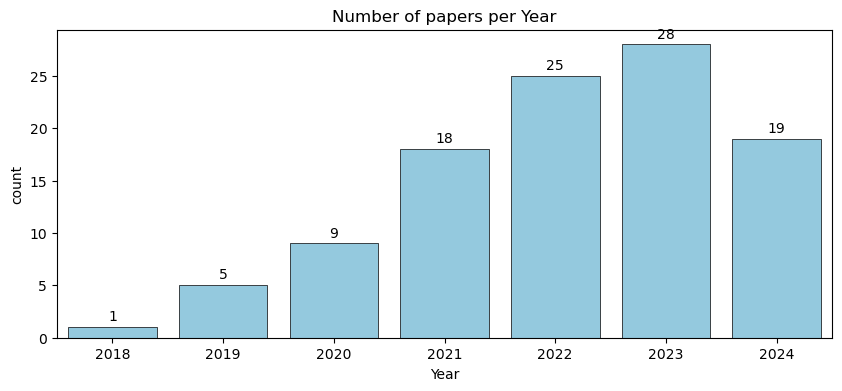

In [81]:
# barplot of the number of papers per Year (vertical)
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Year', order=sorted(df['Year'].unique()), color='skyblue', edgecolor='black', linewidth=0.5)
# add number of papers per Year on the top of each bar
for i, v in enumerate(df['Year'].value_counts(sort=False).sort_index()):
    plt.text(i, v+1, v, ha='center', va='center')
plt.title('Number of papers per Year')
plt.show()

In [82]:
# import old_results
old_results = pd.read_excel('../results/old_results.xlsx')

In [100]:
# using titles, find te number of papers in old_results that are in not in df
count = 0
for title, is_relevant in zip(old_results['Abstract'], old_results['is_relevent']):
    if is_relevant == 0:
        continue 
    if title not in df['Abstract'].values:
        count += 1
        print(title[:50])
print("% of papers in old_results that are not in df:", count )

Adversarial Reinforcement Learning (ARL) in Multi-
In recent years, a proliferation of methods were d
Communication can promote coordination in cooperat
Existing research shows that cooperative multi-age
Abstract:Intrusion detection systems can defective
Abstract:Multiple unmanned aerial vehicle (multi-U
The fourth industrial (I4.0) revolution encourages
Adversarial robustness assessment for video recogn
Although several multi-agent deep reinforcement le
Deep reinforcement learning (DRL) algorithms inter
Early threat detection is an increasing part of th
Electric autonomous vehicles (EAVs) are getting at
In recent years, a proliferation of methods were d
In this article, we consider centralized training 
In this research, we investigate the reinforcement
Multiagent deep reinforcement learning (DRL) makes
Multiagent deep reinforcement learning (MADRL) has
Multiagent reinforcement learning (MARL) promises 
Numerous studies have demonstrated, in-depth, the 
Reinforcement learning agents a

In [110]:
# merge old_results with df in a new dataframe (df2)
cols = ['Title', 'Source', 'Year', 'Abstract','URL', 'is_relevent']
df2 = pd.merge(df, old_results[cols], on='Title', how='outer')
# merge x and y columns
df2['Source'] = df2['Source_x'].fillna(df2['Source_y'])
df2['Year'] = df2['Year_x'].fillna(df2['Year_y'])
df2['Abstract'] = df2['Abstract_x'].fillna(df2['Abstract_y'])
df2['URL'] = df2['URL_x'].fillna(df2['URL_y'])
df2.drop(['Source_x', 'Source_y', 'Year_x', 'Year_y', 'Abstract_x', 'Abstract_y', 'URL_x', 'URL_y', 'is_relevent'], axis=1, inplace=True)

In [111]:
df2.sort_values('Title', ascending=False, inplace=True)

In [112]:
df2.head()

,Title,Verdict,Source,Year,Abstract,URL
112,learning system with time-delayed data transmi...,NaN,MDPI Journal of Sensor and Actuator Networks,2022.0,Abstract:This paper studies the gradient-based...,https://www.mdpi.com/2224-2708/11/3/45
106,c-MBA: Adversarial attack for cooperative MARL...,NaN,NeurIPS,2022.0,"In recent years, a proliferation of methods we...",https://openreview.net/forum?id=AFfKSfcF6Sv
53,[PDF][PDF] Improving Intrusion Detection Syste...,The abstract mentions the use of Multi-Agent D...,www.scitepress.org,2023.0,Intrusion detection is a crucial task in the f...,https://www.scitepress.org/Papers/2023/121246/...
29,[PDF][PDF] Decentralized Anomaly Detection in ...,The abstract discusses the problem of detectin...,www.ijcai.org,2023.0,We consider the problem of detecting adversari...,https://www.ijcai.org/proceedings/2023/0019.pdf
65,[HTML][HTML] Multi-agent reinforcement learnin...,The abstract mentions the use of a Multiagent ...,MDPI,2021.0,Abstract:The fast emergence of IoT devices and...,https://www.mdpi.com/2227-7080/9/3/44
